<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def remove_cloud_reflectance_and_keep_green(image_path, cloud_threshold=170, lower_green=(35, 10, 40), upper_green=(115, 255, 255)):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to HSV color space to segment green areas
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Create a mask to keep only green areas
    green_mask = cv2.inRange(hsv_image, np.array(lower_green), np.array(upper_green))
    # green mask result alone
    green_result = cv2.bitwise_and(image, image, mask=green_mask)
    # Convert to grayscale for cloud detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Create a mask based on the cloud threshold
    _, cloud_mask = cv2.threshold(gray_image, cloud_threshold, 255, cv2.THRESH_BINARY)
    # Invert the cloud mask to target clouds
    cloud_mask = cv2.bitwise_not(cloud_mask)
    # cloud mask result alone
    cloud_result = cv2.bitwise_and(image, image, mask=cloud_mask)
    # Combine the green mask and the inverted cloud mask
    combined_mask = cv2.bitwise_or(green_mask, cloud_mask)

    # Apply the combined mask to the original image to keep non-cloud areas and green regions
    result = cv2.bitwise_and(image, image, mask=combined_mask)

    # Convert the result to a PIL image
    result_pil = Image.fromarray(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

    # Plot the results
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    # Original image
    axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title("Original Image")
    axs[0, 0].axis('off')

    # Final result
    axs[0, 1].imshow(result_pil)
    axs[0, 1].set_title("Final Result")
    axs[0, 1].axis('off')

    # Green mask
    axs[1, 0].imshow(green_result, cmap='gray')
    axs[1, 0].set_title("Green Mask")
    axs[1, 0].axis('off')

    # Cloud mask
    axs[1, 1].imshow(cloud_result, cmap='gray')
    axs[1, 1].set_title("Cloud Mask")
    axs[1, 1].axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return result_pil


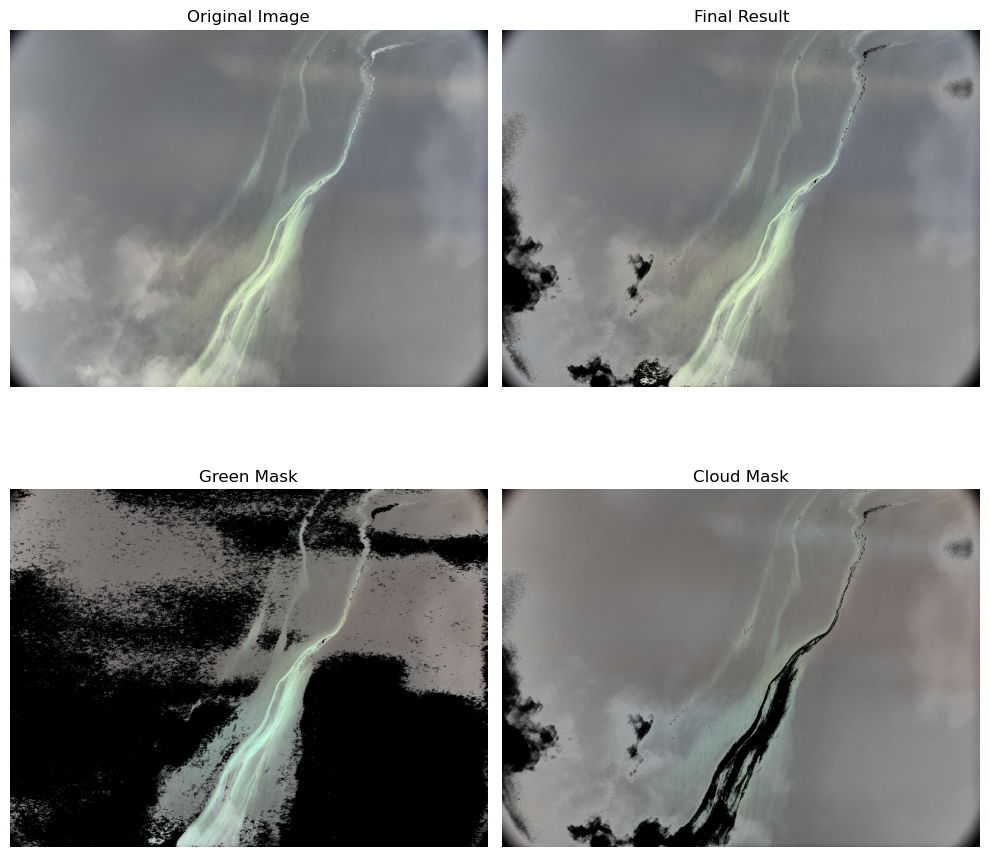

In [2]:

# Example usage
image_path ='example1'
cloud_removed_image = remove_cloud_reflectance_and_keep_green(image_path)

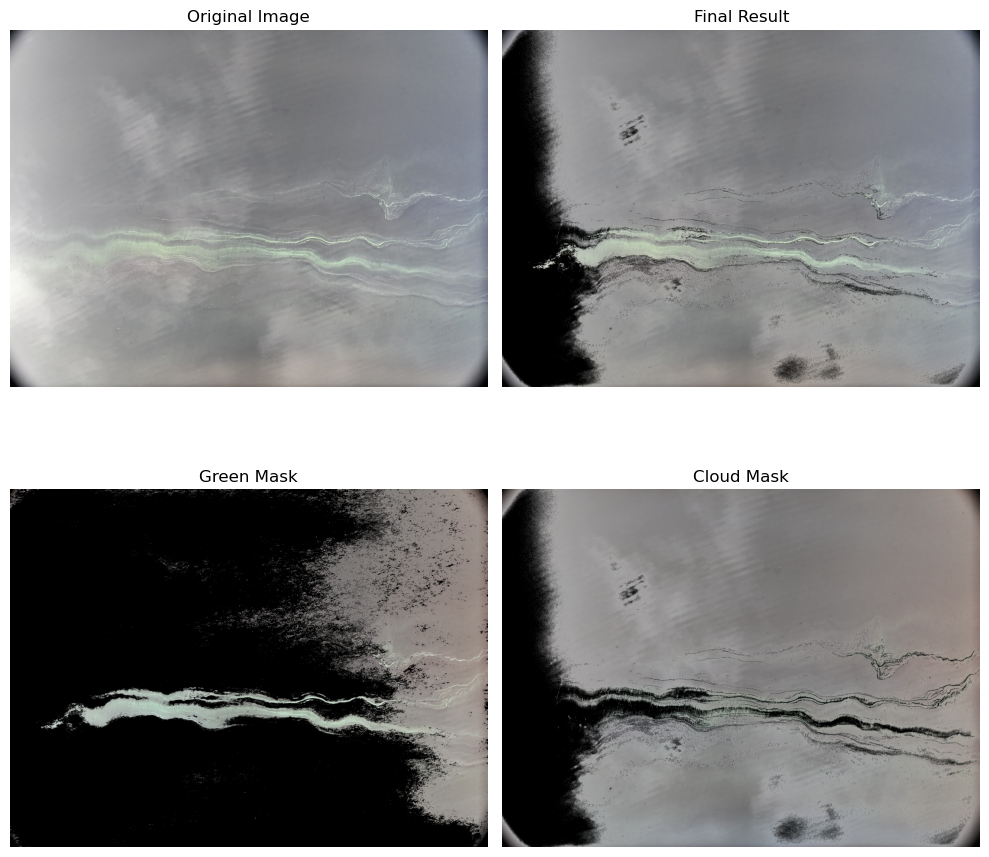

In [3]:
image_path ='example2'
cloud_removed_image = remove_cloud_reflectance_and_keep_green(image_path)